# Note
本文档是学弟写的代码，用来展示出电警或卡口的分布。
输入是一个excel文件，格式如下图所示.
输出为一个excel文档，该文档中是最后用来绘图的电警or卡口的点位。以及一个html文档，文档中有电警点位分布的边界（蓝色线框）以及所有的电警点位分布。

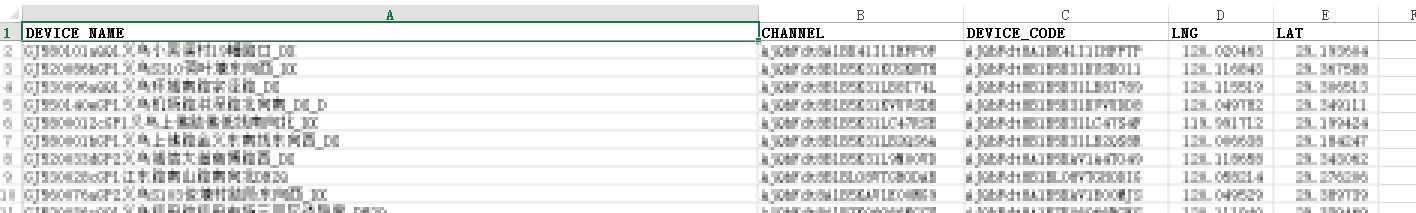

In [2]:
import folium
import xlrd
import pandas as pd

In [10]:
locations = pd.read_excel(r'1_点位.xlsx')
locations = locations.dropna()
locations = locations[(locations['LNG']>=119) & (locations['LNG']<=121)]
locations = locations[(locations['LAT']>=29) & (locations['LAT']<=30)]

In [12]:
a = []  #记录所有电警位置的边界。
a.append(locations['LNG'].min())
a.append(locations['LNG'].max())
a.append(locations['LAT'].min())
a.append(locations['LAT'].max())

In [57]:
places_on_boundary = [('1', a[2], a[0]),
('2', a[2], a[1]), ('3',a[3], a[1]),
('4', a[3], a[0]), ('5',a[2], a[0])]

In [58]:
# get the coordinates for these places
lats = [x[1] for x in places_on_boundary]
lons = [x[2] for x in places_on_boundary]
coordinates = zip(lats, lons)
# print(coordinates);

In [59]:
bound = []  # the boundary line 
for y , x in coordinates:
    bound.append([y , x])
bound

[[29.048459, 119.848322],
 [29.048459, 120.211491],
 [29.509874, 120.211491],
 [29.509874, 119.848322],
 [29.048459, 119.848322]]

In [60]:
m = folium.Map(location=[(a[2]+a[3])/2, (a[0]+a[1])/2], zoom_start=13)
print(m)
boundary = folium.PolyLine(locations=bound,weight=1,color = 'blue');
m.add_child(boundary)
#for point in coordinates:
 #   print(point)
  #  folium.Marker(point).add_to(m)


In [61]:
# 将用来绘图的点保存为excel
writer = pd.ExcelWriter('点位.xlsx')
locations.to_excel(writer, 'Sheet', index=False)
writer.save()

In [65]:
workbook = xlrd.open_workbook('点位.xlsx')
sheet = workbook.sheet_by_index(0);
cameralist = [];
for row in range(1, sheet.nrows):
    values = sheet.row_values(row);
    cameralist.append((values[4], values[3]));

for point in cameralist:
    folium.CircleMarker(
        location=[point[0], point[1]],
        radius=0.3,
        weight=3
    ).add_to(m);
m.save('电警点位.html');